# Student's Percentage Prediction

## Task - 1

### To EXplore the Supervised Machine Learning
      In this regression task we will predict the percentage of  marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Import the required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# reading the csv data from the file
df = pd.read_csv('studentscores.csv')
df.head() # Reading the first 5 rows of the data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
df # reading the whole data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [13]:
# check whether the data has any null values if yes convert that to the categorical values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

         No null values found in the data so, the cleaning of the data is not required for the data

Text(0, 0.5, 'Score Percentage')

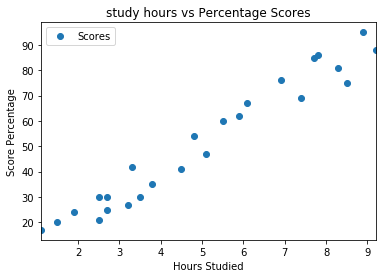

In [18]:
# plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')
plt.title('study hours vs Percentage Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score Percentage')

Text(0, 0.5, 'Score Percentage')

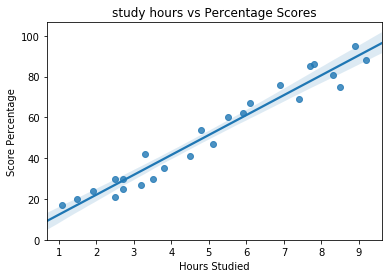

In [22]:
# plotting the refressorplot to determine the relationship between the feature and target
sns.regplot(x=df['Hours'], y=df['Scores'], data = df)
plt.title('study hours vs Percentage Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score Percentage')

       above Graph tells that , it is a positive linear relation between the hours studied and score percentage

### Making our Data
    define our data "attribute"(input) variable and "labels"(output)

In [26]:
X = df.iloc[: , :1].values
y = df.iloc[: , 1].values

    we have the attributes and labels defined , which is the test data and the train data , next train the train data and test the test data

In [30]:
# use skicit learns library to split test train the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.33, random_state=42)

# we have Training and testing the sets fpr training the model

## Training the Algorithm

In [31]:
# Making the Linear REgression
y_train_new = y_train.reshape(-1 , 1)
ones = np.ones([X_train.shape[0] , 1]) # the array contain only the ones

X_train_new = np.concatenate([ones , X_train] , 1) # connecting the ones to X matrix


In [32]:
# Creating the theta matrix
# small alpha value

alpha = 0.01
iters = 5000

theta = np.array([[1.0 , 1.0]])
print(theta)

[[1. 1.]]


In [34]:
# Creating the function for the cost
def computeCost(X , y ,theta):
    inner = np.power(((X @ theta.T) - y) , 2)
    return np.sum(inner) / (2*len(X))

In [36]:
computeCost(X_train_new , y_train_new , theta)

1434.6246874999997

# Gradient Descent

In [39]:
def gradientDescent(X , y , theta , alpha , iters):
    m = len(X)
    for i in range(iters):
        theta = theta - (alpha/m) * np.sum(((X @ theta.T) - y) *X , axis = 0)
        cost = computeCost(X,y , theta)
        return(theta , cost)
    

In [42]:
g, cost = gradientDescent(X_train_new, y_train_new, theta, alpha, iters)  
print("Intercept => ", g[0][0])
print("Coefficient =>  ", g[0][1])
print("The final cost obtained after optimisation => ", cost)

Intercept =>  1.4798125
Coefficient =>   4.146693750000001
The final cost obtained after optimisation =>  602.3476526690259


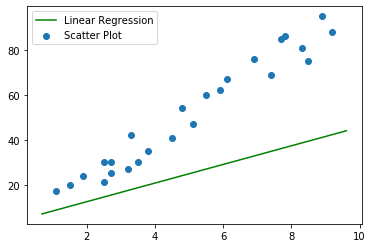

In [44]:
# pplot the Scatter points
plt.scatter(X,y , label='Scatter Plot')
axes = plt.gca()

# line plot

x_vals = np.array(axes.get_xlim())
y_vals = g[0][1] + g[0][1]*x_vals 

plt.plot(x_vals , y_vals ,color ='green' , label = "Linear Regression")

plt.legend()
plt.show()

# Using Skicit Library 

In [45]:
from sklearn.linear_model import LinearRegression

In [47]:
regressor = LinearRegression()
# Fitting the trainned data
regressor.fit(X_train , y_train)

LinearRegression()

In [48]:
print("Coefficient =>" , regressor.coef_)
print("Inercept =>" , regressor.intercept_)

Coefficient => [9.65029083]
Inercept => 3.4050301755918895


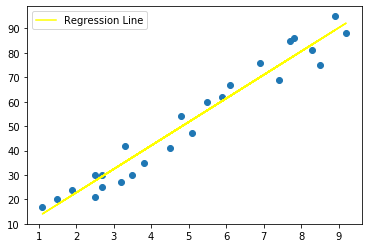

In [49]:
# Plotting the regression line
line = regressor.coef_*X + regressor.intercept_

# plotting for the test data

plt.scatter(X , y)
plt.plot(X , line , color = 'yellow' , label="Regression Line")
plt.legend()
plt.show()

# Making predictions

In [52]:
print(X_test)
y_pred = regressor.predict(X_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]
 [2.7]
 [3.3]
 [5.1]
 [3.8]]


In [53]:
# Comparing the Actual and the Predicted data
df = pd.DataFrame({'Original' : y_test , 'Predicted' : y_pred})
df

,Original,Predicted
0,81,83.502444
1,30,27.530757
2,21,27.530757
3,76,69.992037
4,62,60.341746
5,25,29.460815
6,42,35.250990
7,47,52.621513
8,35,40.076135


In [54]:
# Estimating Training and testing Score
print("Training Score:",regressor.score(X_train , y_train))
print("Test Score:" , regressor.score(X_test , y_test))

Training Score: 0.9543348637719865
Test Score: 0.9435488190277577


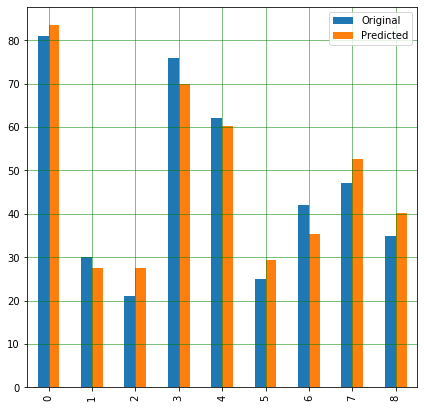

In [55]:
df.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linewidth='0.5', color='green')
plt.grid(which='minor', linewidth='0.5', color='black')
plt.show()

In [57]:
# Testing the new Data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.67022037739972


# Evaluating the Model

     Evaluating the performance of algorithm

In [58]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.564015037730867
Mean Squared Error: 24.074686364260987
Root Mean Squared Error: 4.90659620962037
R-2: 0.9435488190277577


        R-squared gives the goodness of the fit and as can be seen it is 94.3% which is really good. This means that the algorithm has proven to be good for the given data.

### The model's accuracy is 94.35%

## Thanks to the Sparks foundation for the Oppurtunity 